This notebook shows how to create 2D slices of 3D particle data from MMS FPI and HPCA using PySPEDAS

Note: these routines are still being beta tested; please report potential issues to Jim Lewis, jwl@ssl.berkeley.edu

In [63]:
import pytplot
from pyspedas.mms.particles.mms_part_slice2d import mms_part_slice2d

# Fast ion flows observed by the MMS FPI and HPCA instruments during a dayside reconnection event on March 24, 2023

In [64]:
time = '2023-03-24/07:07:33'

## FPI ions with geometric interpolation

The data are rotated such that the x axis is parallel to B field and the bulk velocity defines the x-y plane, and plotted using geometric interpolation (each point on the plot is given the value of the bin it intersects)

09-May-24 16:43:01: Loading pydata/mms1/fpi/brst/l2/dis-dist/2023/03/24/mms1_fpi_brst_l2_dis-dist_20230324070453_v3.4.0.cdf
09-May-24 16:43:02: The name mms1_dis_pitchangdist_lowen_brst is currently not in pytplot
09-May-24 16:43:02: The name mms1_dis_pitchangdist_miden_brst is currently not in pytplot
09-May-24 16:43:02: The name mms1_dis_pitchangdist_highen_brst is currently not in pytplot
09-May-24 16:43:02: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
09-May-24 16:43:02: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
09-May-24 16:43:02: Problem reading the variable: mms1_des_compressionloss_brst_moms
09-May-24 16:43:02: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
09-May-24 16:43:02: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
09-May-24 16:43:02: Problem reading the variable: mms1_des_compressionloss_brst_dist
09-May-24 16:43:04: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1

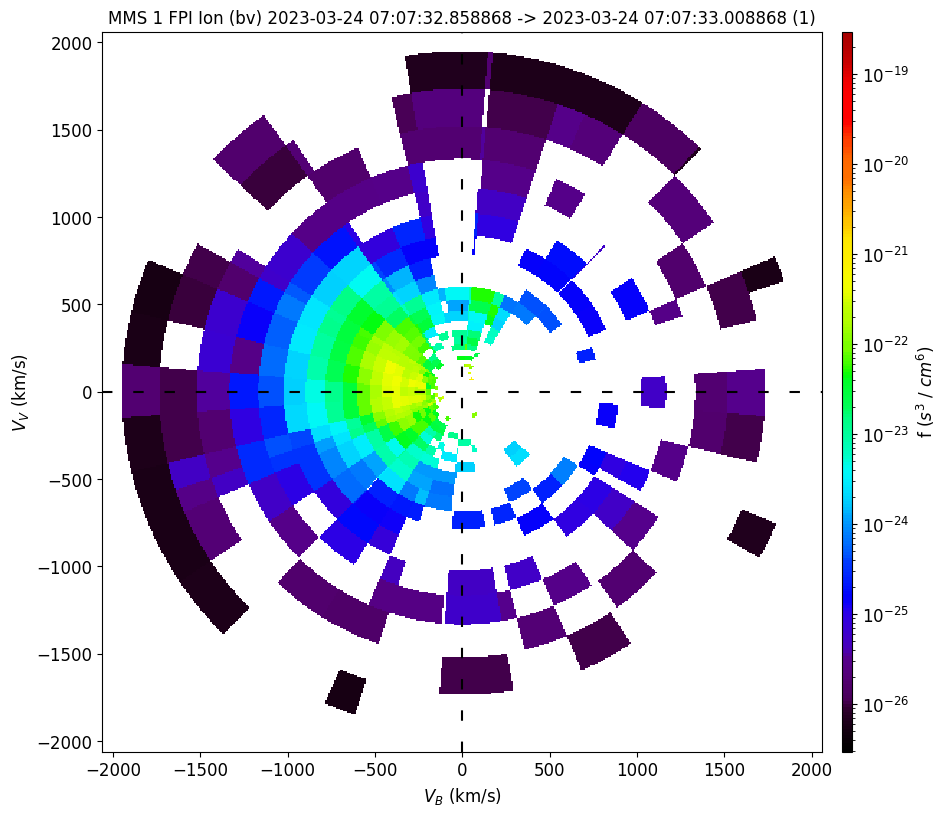

In [65]:
mms_part_slice2d(time=time, instrument='fpi', data_rate='brst', species='i', rotation='bv', erange=[0, 20000])

Return the slice data structure (instead of plotting) by setting the `return_slice` keyword to `True`

In [66]:
the_slice = mms_part_slice2d(return_slice=True, time=time, instrument='fpi', species='i', rotation='bv', erange=[0, 20000])

09-May-24 16:43:10: Loading pydata/mms1/fpi/fast/l2/dis-dist/2023/03/mms1_fpi_fast_l2_dis-dist_20230324060000_v3.4.0.cdf
09-May-24 16:43:12: The name mms1_dis_pitchangdist_lowen_fast is currently not in pytplot
09-May-24 16:43:12: The name mms1_dis_pitchangdist_miden_fast is currently not in pytplot
09-May-24 16:43:12: The name mms1_dis_pitchangdist_highen_fast is currently not in pytplot
09-May-24 16:43:14: Loading pydata/mms1/fgm/srvy/l2/2023/03/mms1_fgm_srvy_l2_20230324_v5.393.0.cdf
09-May-24 16:43:24: Loading pydata/mms1/fpi/fast/l2/dis-moms/2023/03/mms1_fpi_fast_l2_dis-moms_20230324060000_v3.4.0.cdf
09-May-24 16:43:24: The name mms1_dis_pitchangdist_lowen_fast is currently not in pytplot
09-May-24 16:43:24: The name mms1_dis_pitchangdist_miden_fast is currently not in pytplot
09-May-24 16:43:24: The name mms1_dis_pitchangdist_highen_fast is currently not in pytplot
09-May-24 16:43:24: Averaging mms1_fgm_b_gse_srvy_l2_bvec
09-May-24 16:43:24: Averaging mms1_dis_bulkv_gse_fast
09-Ma

The slice is stored as a dictionary:

In [67]:
the_slice.keys()

dict_keys(['project_name', 'spacecraft', 'data_name', 'units_name', 'species', 'xyunits', 'rotation', 'energy', 'trange', 'zrange', 'rrange', 'rlog', 'interpolation', 'n_samples', 'data', 'xgrid', 'ygrid'])

You can also create 1D cuts through the 2D slice:

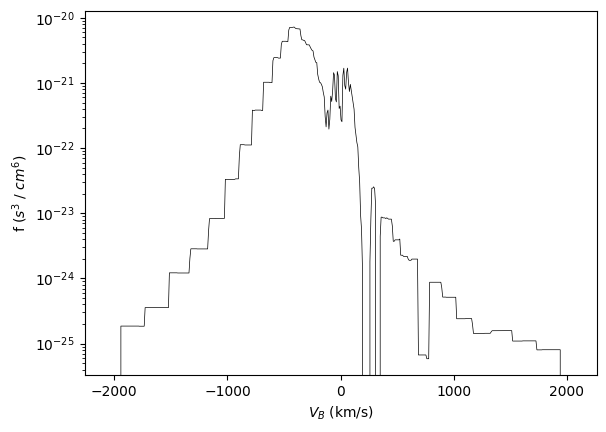

In [68]:
from pyspedas.particles.spd_slice2d.slice1d_plot import plot

plot(the_slice, 'x', [-100, 100])  # summed from Vv=[-100, 100]

## FPI ions with 2D interpolation

The data are rotated such that the x axis is parallel to B field and the bulk velocity defines the x-y plane, and plotted using 2D interpolation (data points within the specified theta or z-axis range are projected onto the slice plane and linearly interpolated onto a regular 2D grid). The default theta range is [-20, +20]

09-May-24 16:43:30: Loading pydata/mms1/fpi/brst/l2/dis-dist/2023/03/24/mms1_fpi_brst_l2_dis-dist_20230324070453_v3.4.0.cdf
09-May-24 16:43:31: The name mms1_dis_pitchangdist_lowen_brst is currently not in pytplot
09-May-24 16:43:31: The name mms1_dis_pitchangdist_miden_brst is currently not in pytplot
09-May-24 16:43:31: The name mms1_dis_pitchangdist_highen_brst is currently not in pytplot
09-May-24 16:43:31: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
09-May-24 16:43:31: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
09-May-24 16:43:31: Problem reading the variable: mms1_des_compressionloss_brst_moms
09-May-24 16:43:31: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
09-May-24 16:43:31: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
09-May-24 16:43:31: Problem reading the variable: mms1_des_compressionloss_brst_dist
09-May-24 16:43:33: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1

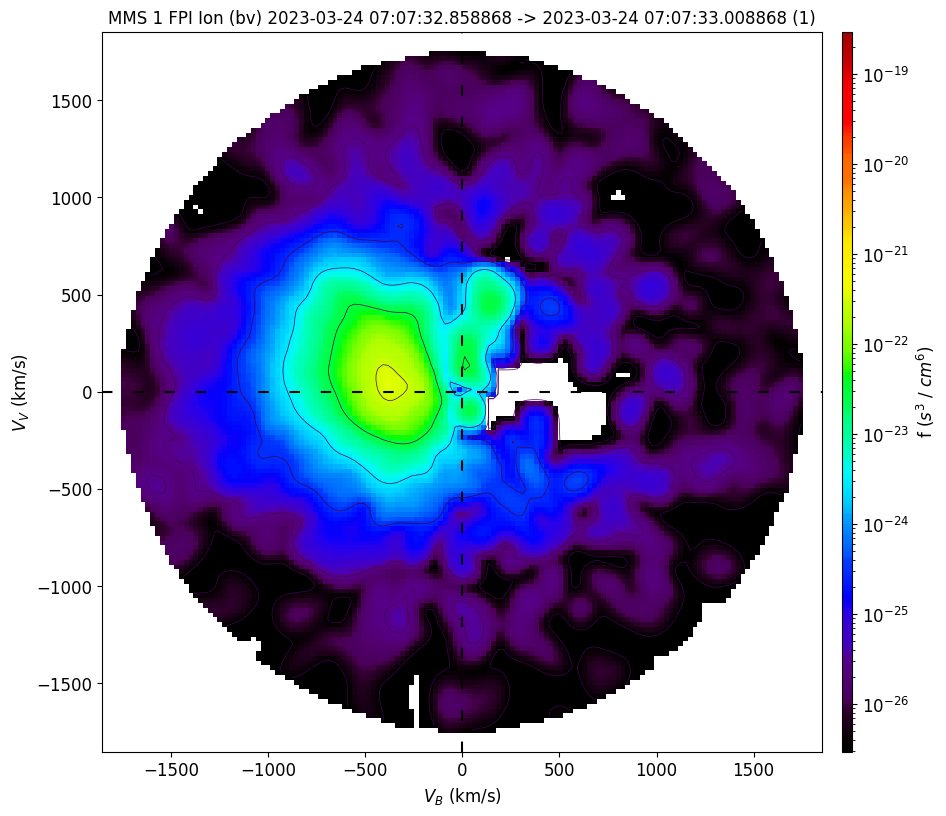

In [69]:
mms_part_slice2d(interpolation='2d', time=time, instrument='fpi', data_rate='brst', species='i', rotation='bv', erange=[0, 20000])

## HPCA H+ with geometric interpolation

Same as above, but with HPCA H+ data

09-May-24 16:43:38: Loading pydata/mms1/hpca/brst/l2/ion/2023/03/24/mms1_hpca_brst_l2_ion_20230324070453_v4.3.1.cdf
09-May-24 16:43:41: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1_fgm_brst_l2_20230324070453_v5.391.0.cdf
09-May-24 16:43:43: Loading pydata/mms1/hpca/brst/l2/moments/2023/03/24/mms1_hpca_brst_l2_moments_20230324070453_v4.3.1.cdf
09-May-24 16:43:43: Averaging mms1_fgm_b_gse_brst_l2_bvec
09-May-24 16:43:43: Averaging mms1_hpca_hplus_ion_bulk_velocity
09-May-24 16:43:43: Aligning slice plane to: bv
09-May-24 16:43:45: Finished slice at 2023-03-24 07:07:28.880060


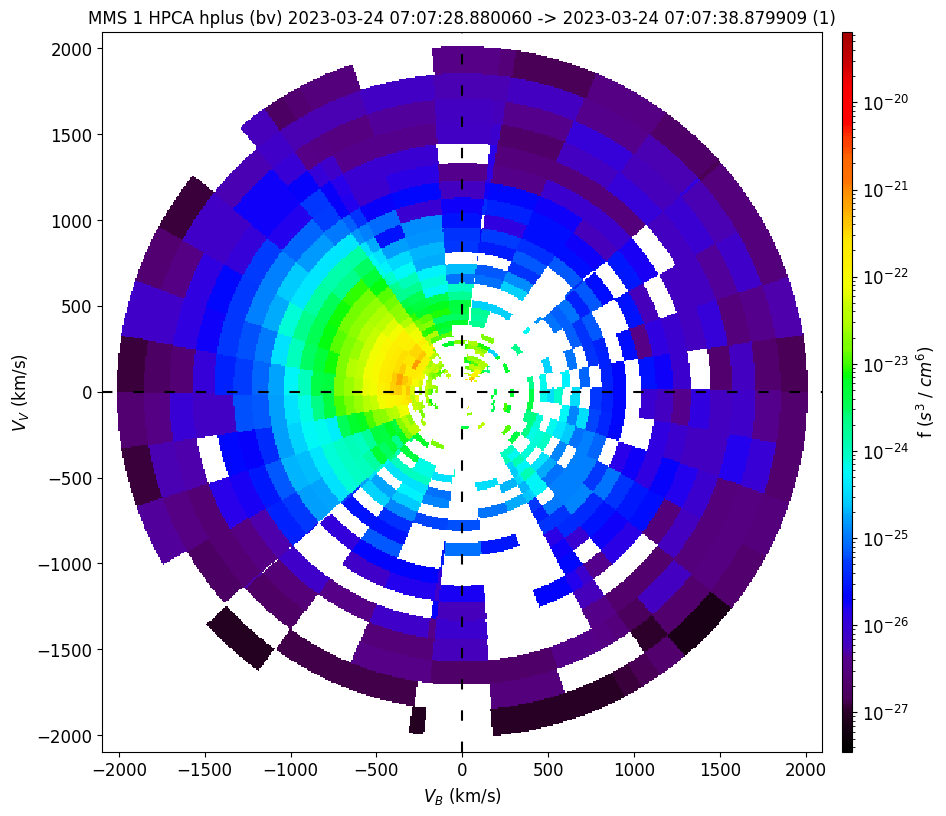

In [70]:
mms_part_slice2d(time=time, instrument='hpca', species='hplus', data_rate='brst', rotation='bv', erange=[0, 20000])

## HPCA H+ with 2d interpolation

and with 2D interpolation. Note that with 2D interpolation, smoothing is enabled by default and set to 7 points; you can override this with the smooth keyword

09-May-24 16:43:47: Loading pydata/mms1/hpca/brst/l2/ion/2023/03/24/mms1_hpca_brst_l2_ion_20230324070453_v4.3.1.cdf
09-May-24 16:43:49: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1_fgm_brst_l2_20230324070453_v5.391.0.cdf
09-May-24 16:43:52: Loading pydata/mms1/hpca/brst/l2/moments/2023/03/24/mms1_hpca_brst_l2_moments_20230324070453_v4.3.1.cdf
09-May-24 16:43:52: Averaging mms1_fgm_b_gse_brst_l2_bvec
09-May-24 16:43:52: Averaging mms1_hpca_hplus_ion_bulk_velocity
09-May-24 16:43:52: Aligning slice plane to: bv
09-May-24 16:43:52: Finished slice at 2023-03-24 07:07:28.880060


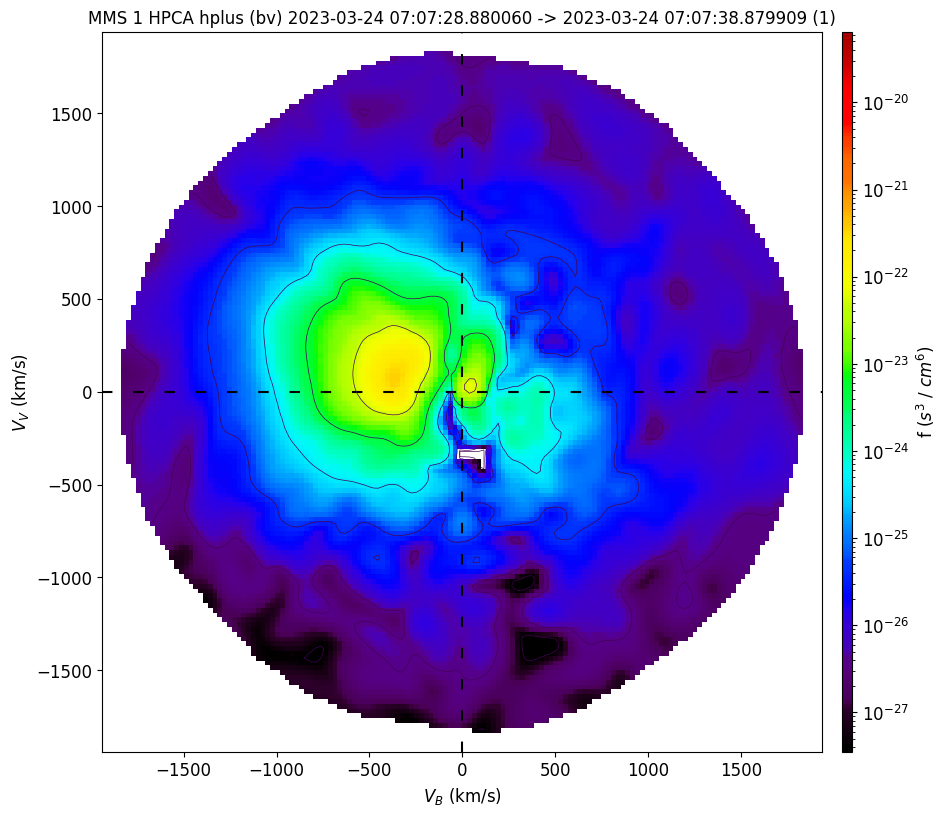

In [71]:
mms_part_slice2d(interpolation='2d', time=time, instrument='hpca', data_rate='brst', species='hplus', rotation='bv', erange=[0, 20000])

Change the rotation such that the x axis is parallel to B field; the B x V(bulk) vector defines the x-y plane:

09-May-24 16:43:54: Loading pydata/mms1/hpca/brst/l2/ion/2023/03/24/mms1_hpca_brst_l2_ion_20230324070453_v4.3.1.cdf
09-May-24 16:43:57: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1_fgm_brst_l2_20230324070453_v5.391.0.cdf
09-May-24 16:43:59: Loading pydata/mms1/hpca/brst/l2/moments/2023/03/24/mms1_hpca_brst_l2_moments_20230324070453_v4.3.1.cdf
09-May-24 16:43:59: Averaging mms1_fgm_b_gse_brst_l2_bvec
09-May-24 16:43:59: Averaging mms1_hpca_hplus_ion_bulk_velocity
09-May-24 16:43:59: Aligning slice plane to: be
09-May-24 16:43:59: Finished slice at 2023-03-24 07:07:28.880060


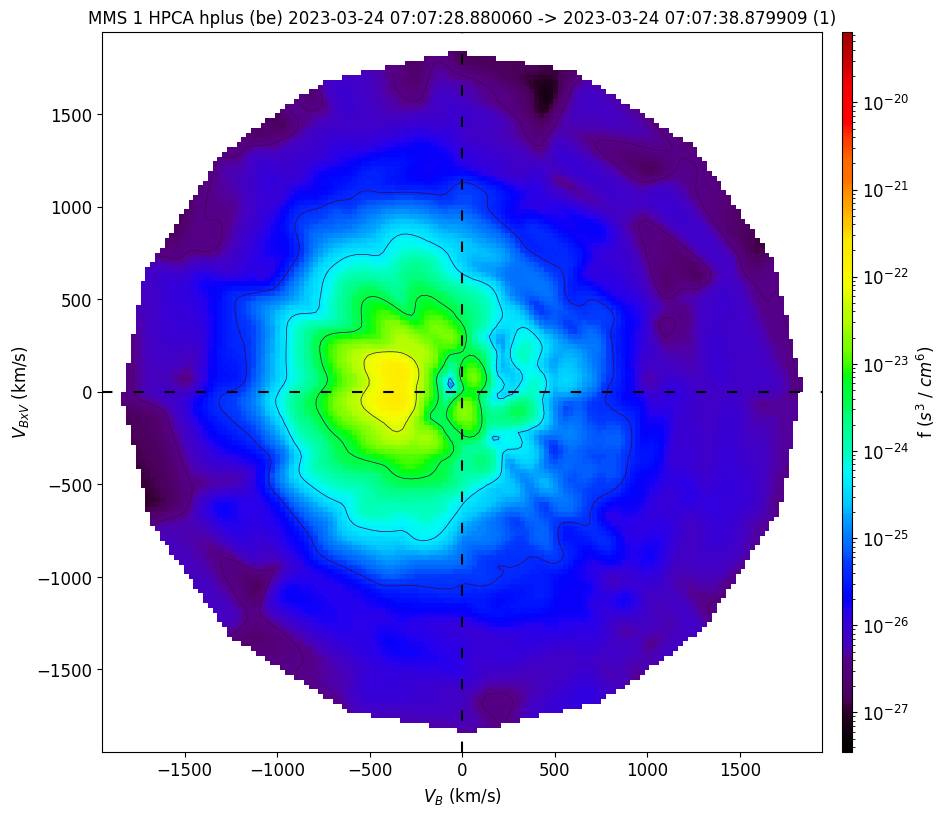

In [72]:
mms_part_slice2d(interpolation='2d', time=time, instrument='hpca', data_rate='brst', species='hplus', rotation='be', erange=[0, 20000])

To see the other options, run help() on mms_part_slice2d:

In [74]:
help(mms_part_slice2d)

Help on function mms_part_slice2d in module pyspedas.mms.particles.mms_part_slice2d:

mms_part_slice2d(trange=None, time=None, samples=None, window=None, center_time=False, erange=None, thetarange=None, zdirrange=None, average_angle=None, sum_angle=None, energy=False, log=False, probe='1', instrument='fpi', data_rate=None, level='l2', spdf=False, mag_data_rate=None, species=None, rotation='xy', custom_rotation=None, slice_x=None, slice_norm=None, subtract_bulk=False, xrange=None, yrange=None, zrange=None, resolution=None, interpolation='geometric', contours=False, title=None, smooth=None, save_jpeg=None, save_png=None, save_svg=None, save_pdf=None, save_eps=None, plotsize=10, dpi=None, return_slice=False, cmap=None, display=True)
    This routine creates 2D slices of 3D distribution function data from the FPI and HPCA instruments.
    This is essentially a wrapper around slice2d and slice2d_plot, that loads the data,
    any required support data, calculates the slice with slice2d and 

In [75]:
import pytplot
pytplot.tplot_names()

0 : Epoch
1 : Epoch_plus_var
2 : Epoch_minus_var
3 : mms1_dis_errorflags_brst_dist
4 : mms1_dis_compressionloss_brst_dist
5 : mms1_dis_steptable_parity_brst
6 : mms1_dis_startdelphi_count_brst
7 : mms1_dis_startdelphi_angle_brst
8 : mms1_dis_phi_brst
9 : mms1_dis_phi_delta_brst
10 : mms1_dis_dist_brst
11 : mms1_dis_disterr_brst
12 : mms1_dis_avgf1counts_brst
13 : mms1_dis_steptimeoffsets_brst
14 : mms1_dis_sector_despinp_brst
15 : mms1_dis_theta_brst
16 : mms1_dis_theta_delta_brst
17 : mms1_dis_energy_brst
18 : mms1_dis_energy_delta_brst
19 : mms1_dis_errorflags_brst_dist_flagbars_dist
20 : mms1_dis_compressionloss_brst_dist_flagbars
21 : mms1_fgm_b_gse_brst_l2
22 : mms1_fgm_b_gsm_brst_l2
23 : mms1_fgm_b_dmpa_brst_l2
24 : mms1_fgm_b_bcs_brst_l2
25 : mms1_fgm_flag_brst_l2
26 : Epoch_state
27 : mms1_fgm_hirange_brst_l2
28 : mms1_fgm_bdeltahalf_brst_l2
29 : mms1_fgm_stemp_brst_l2
30 : mms1_fgm_etemp_brst_l2
31 : mms1_fgm_mode_brst_l2
32 : mms1_fgm_b_dmpa_brst_l2_bvec
33 : mms1_fgm_b_dmpa_

['Epoch',
 'Epoch_plus_var',
 'Epoch_minus_var',
 'mms1_dis_errorflags_brst_dist',
 'mms1_dis_compressionloss_brst_dist',
 'mms1_dis_steptable_parity_brst',
 'mms1_dis_startdelphi_count_brst',
 'mms1_dis_startdelphi_angle_brst',
 'mms1_dis_phi_brst',
 'mms1_dis_phi_delta_brst',
 'mms1_dis_dist_brst',
 'mms1_dis_disterr_brst',
 'mms1_dis_avgf1counts_brst',
 'mms1_dis_steptimeoffsets_brst',
 'mms1_dis_sector_despinp_brst',
 'mms1_dis_theta_brst',
 'mms1_dis_theta_delta_brst',
 'mms1_dis_energy_brst',
 'mms1_dis_energy_delta_brst',
 'mms1_dis_errorflags_brst_dist_flagbars_dist',
 'mms1_dis_compressionloss_brst_dist_flagbars',
 'mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gsm_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2',
 'mms1_fgm_b_bcs_brst_l2',
 'mms1_fgm_flag_brst_l2',
 'Epoch_state',
 'mms1_fgm_hirange_brst_l2',
 'mms1_fgm_bdeltahalf_brst_l2',
 'mms1_fgm_stemp_brst_l2',
 'mms1_fgm_etemp_brst_l2',
 'mms1_fgm_mode_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2_bvec',
 'mms1_fgm_b_dmpa_brst_l2_btot',
 'mms1_fgm_

09-May-24 16:44:09: Loading pydata/mms1/fpi/brst/l2/dis-dist/2023/03/24/mms1_fpi_brst_l2_dis-dist_20230324070453_v3.4.0.cdf
09-May-24 16:44:11: The name mms1_dis_pitchangdist_lowen_brst is currently not in pytplot
09-May-24 16:44:11: The name mms1_dis_pitchangdist_miden_brst is currently not in pytplot
09-May-24 16:44:11: The name mms1_dis_pitchangdist_highen_brst is currently not in pytplot
09-May-24 16:44:11: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
09-May-24 16:44:11: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
09-May-24 16:44:11: Problem reading the variable: mms1_des_compressionloss_brst_moms
09-May-24 16:44:11: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
09-May-24 16:44:11: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
09-May-24 16:44:11: Problem reading the variable: mms1_des_compressionloss_brst_dist
09-May-24 16:44:13: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1

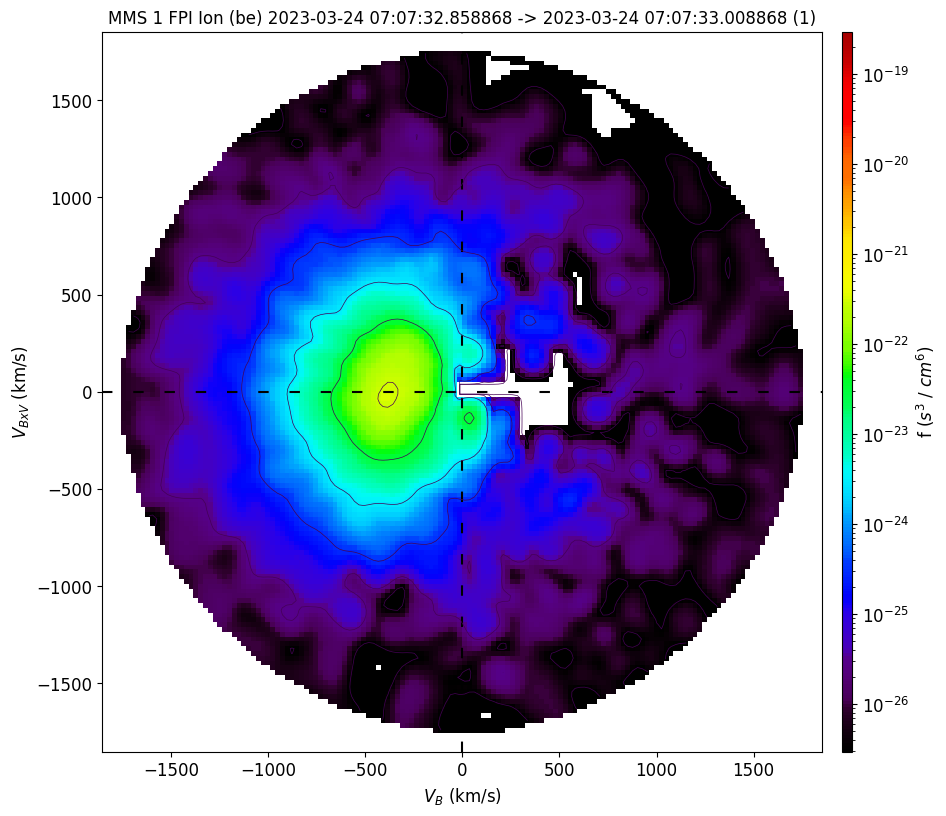

In [76]:
mms_part_slice2d(interpolation='2d', time='2023-03-24 07:07:33', instrument='fpi', species='i',rotation='be', data_rate='brst', erange=[0, 20000])


09-May-24 16:44:18: Loading pydata/mms1/fpi/brst/l2/dis-dist/2023/03/24/mms1_fpi_brst_l2_dis-dist_20230324070453_v3.4.0.cdf
09-May-24 16:44:19: The name mms1_dis_pitchangdist_lowen_brst is currently not in pytplot
09-May-24 16:44:19: The name mms1_dis_pitchangdist_miden_brst is currently not in pytplot
09-May-24 16:44:19: The name mms1_dis_pitchangdist_highen_brst is currently not in pytplot
09-May-24 16:44:19: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
09-May-24 16:44:19: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
09-May-24 16:44:19: Problem reading the variable: mms1_des_compressionloss_brst_moms
09-May-24 16:44:19: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
09-May-24 16:44:19: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
09-May-24 16:44:19: Problem reading the variable: mms1_des_compressionloss_brst_dist
09-May-24 16:44:22: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1

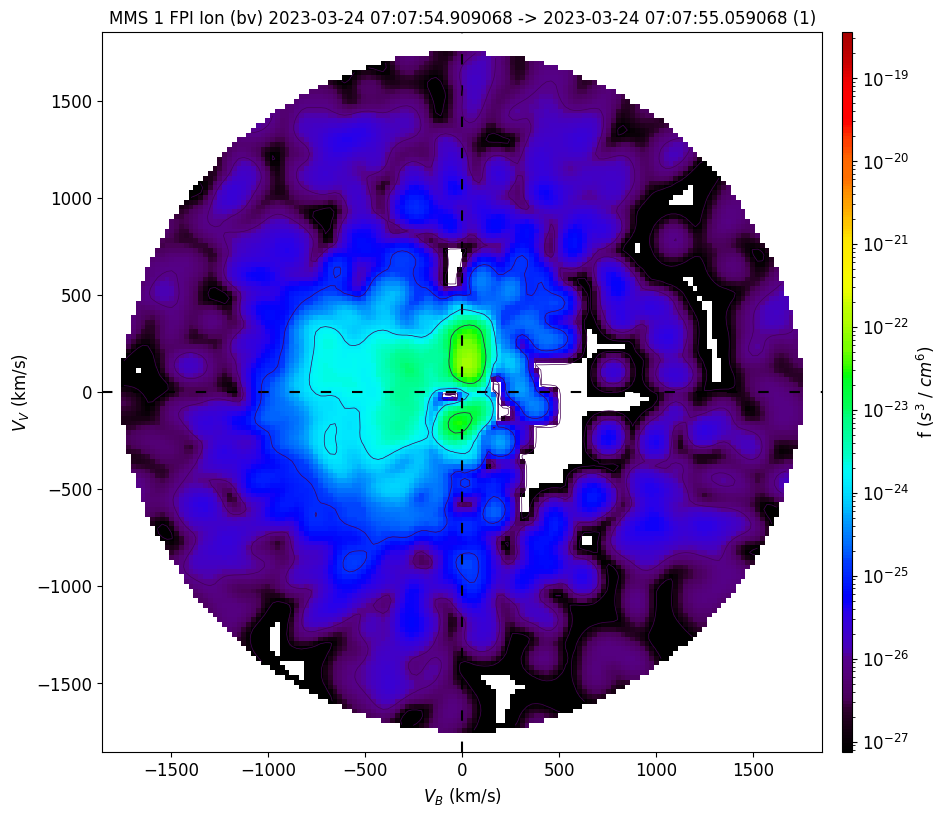

In [77]:
mms_part_slice2d(interpolation='2d', time='2023-03-24 07:07:55', instrument='fpi', species='i',rotation='bv', data_rate='brst', erange=[0, 20000])


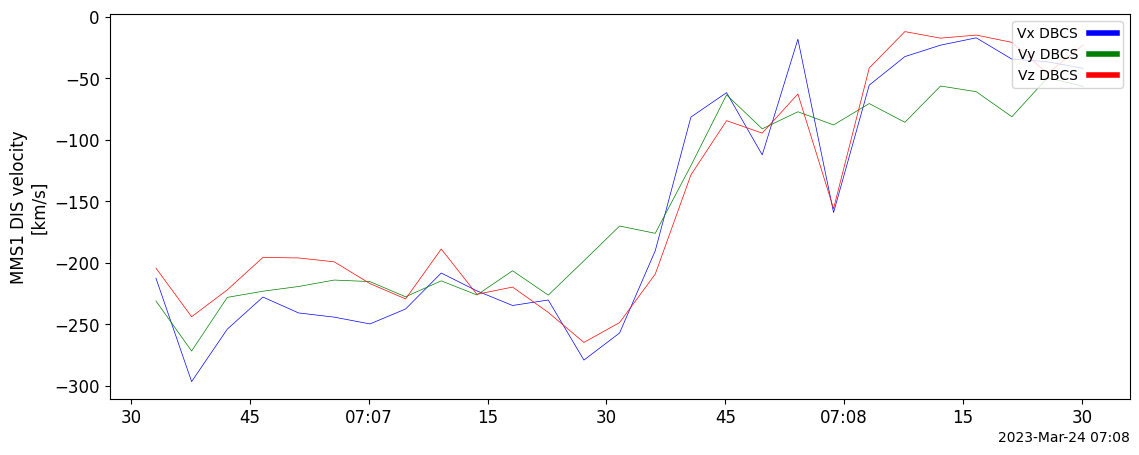

In [78]:
pytplot.tplot( 'mms1_dis_bulkv_dbcs_fast')
